In [109]:
import pandas as pd
import numpy as np
from datetime import datetime

In [419]:
def clean_dataframe(df):
    
    df = df.copy()
    
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    df = pd.pivot_table(df, index=['YYYYMM'], values=['Value'], columns=['Description'])
    df.index = df.index.astype(str)
    df = df[~df.index.str.endswith('13')]
    df.index = pd.to_datetime(df.index, format='%Y%m')
    
    return df

In [246]:
production_by_source = pd.read_csv(
    'data_files/EIA/energy_production_by_source.csv')

In [248]:
production_by_source = clean_dataframe(production_by_source)

In [179]:
production_by_source = clean_dataframe(production_by_source)

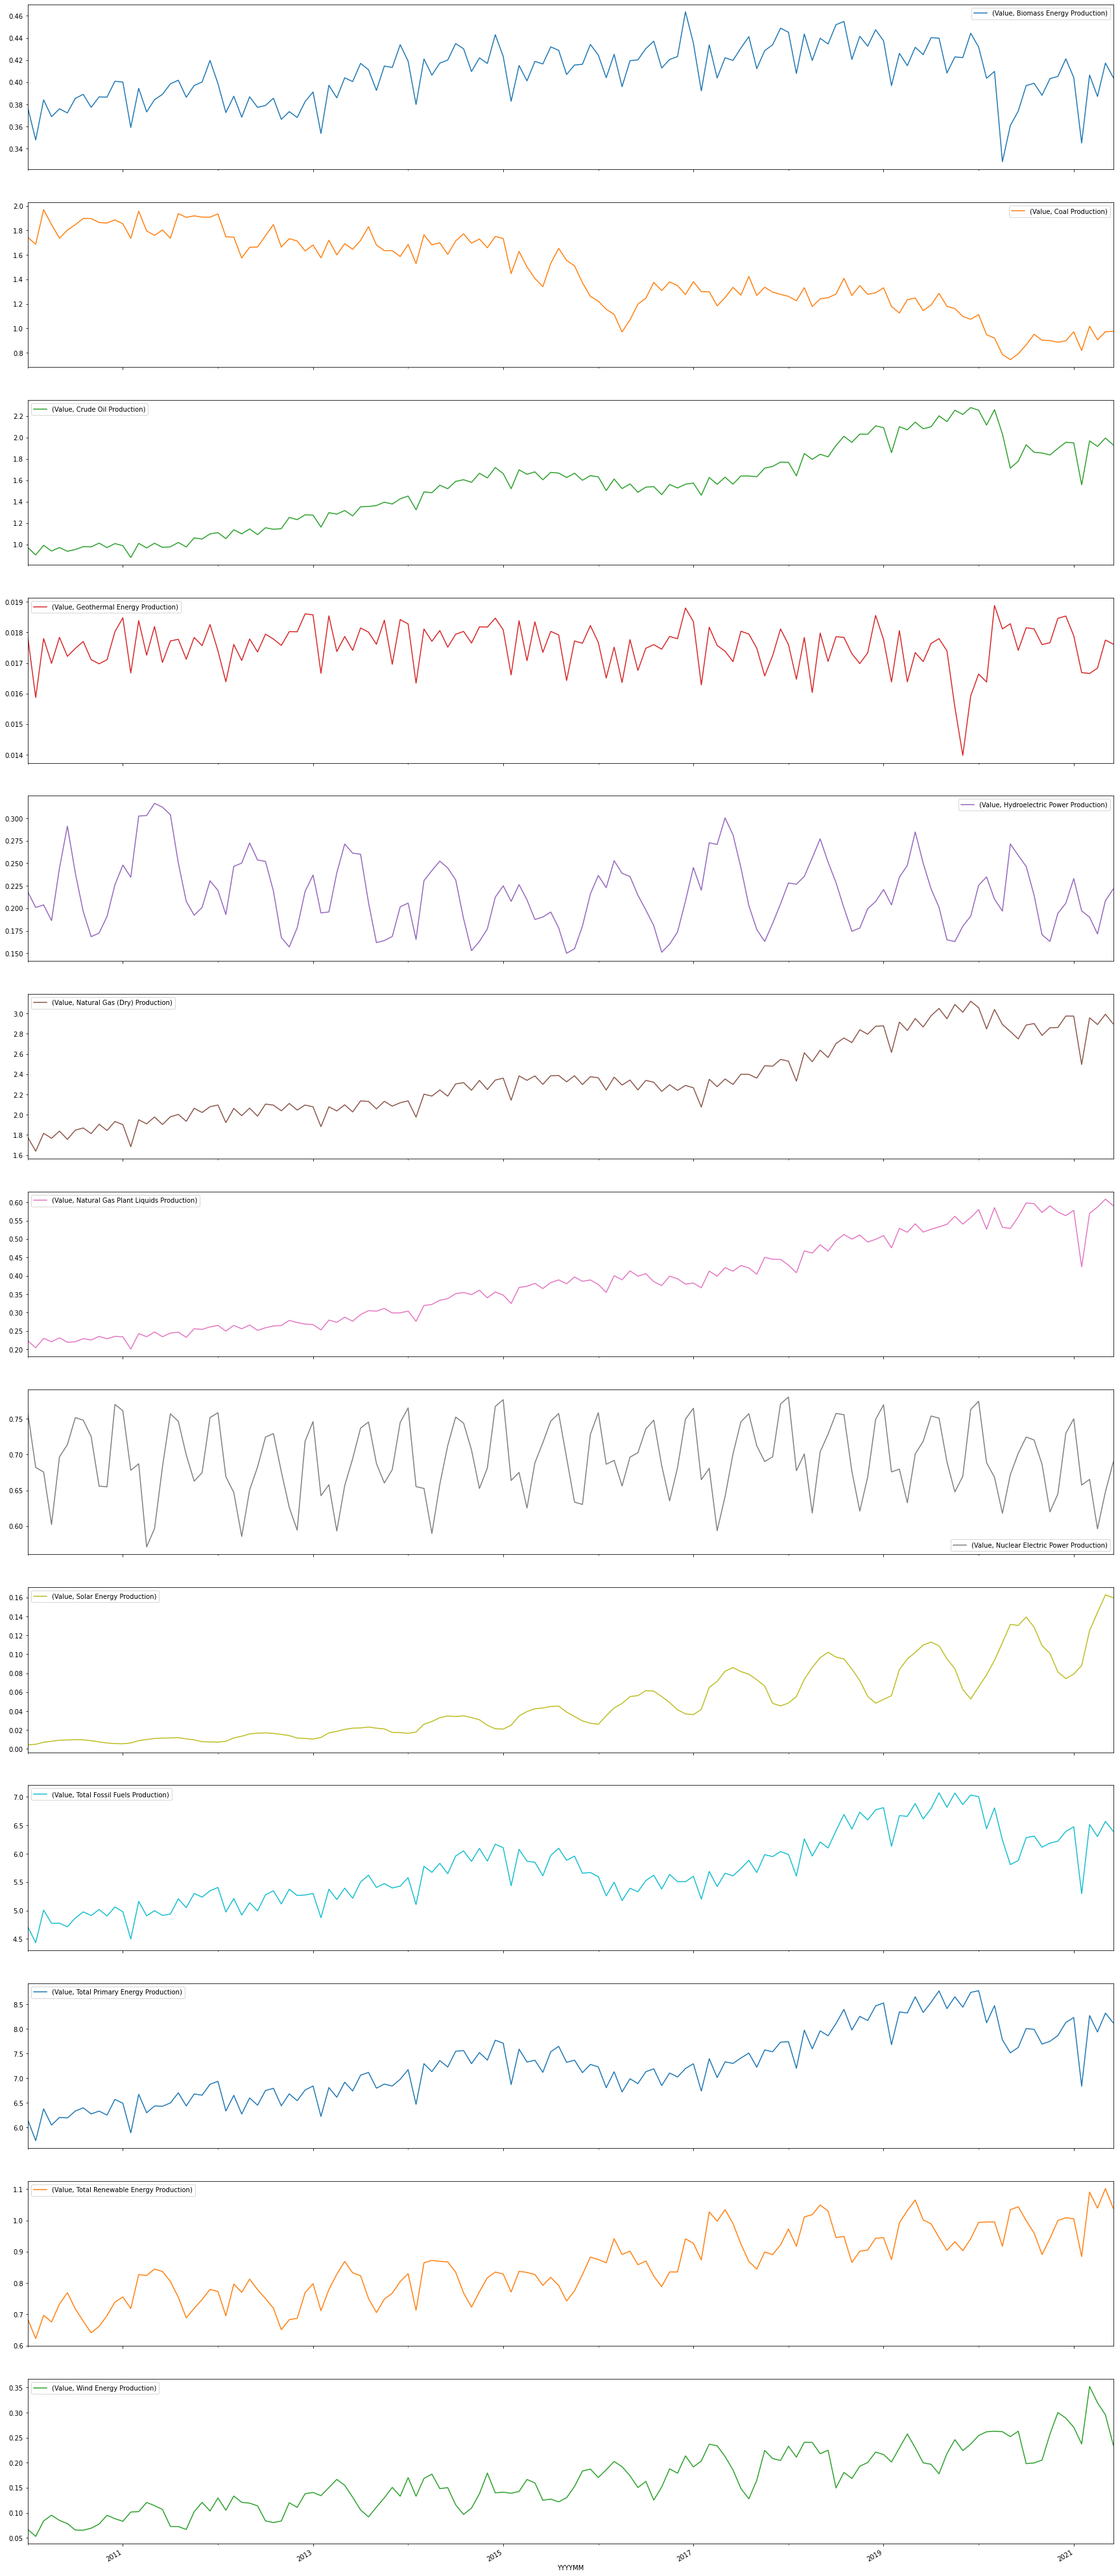

In [255]:
production_by_source['2010':].plot(figsize=(30,80), subplots=True);

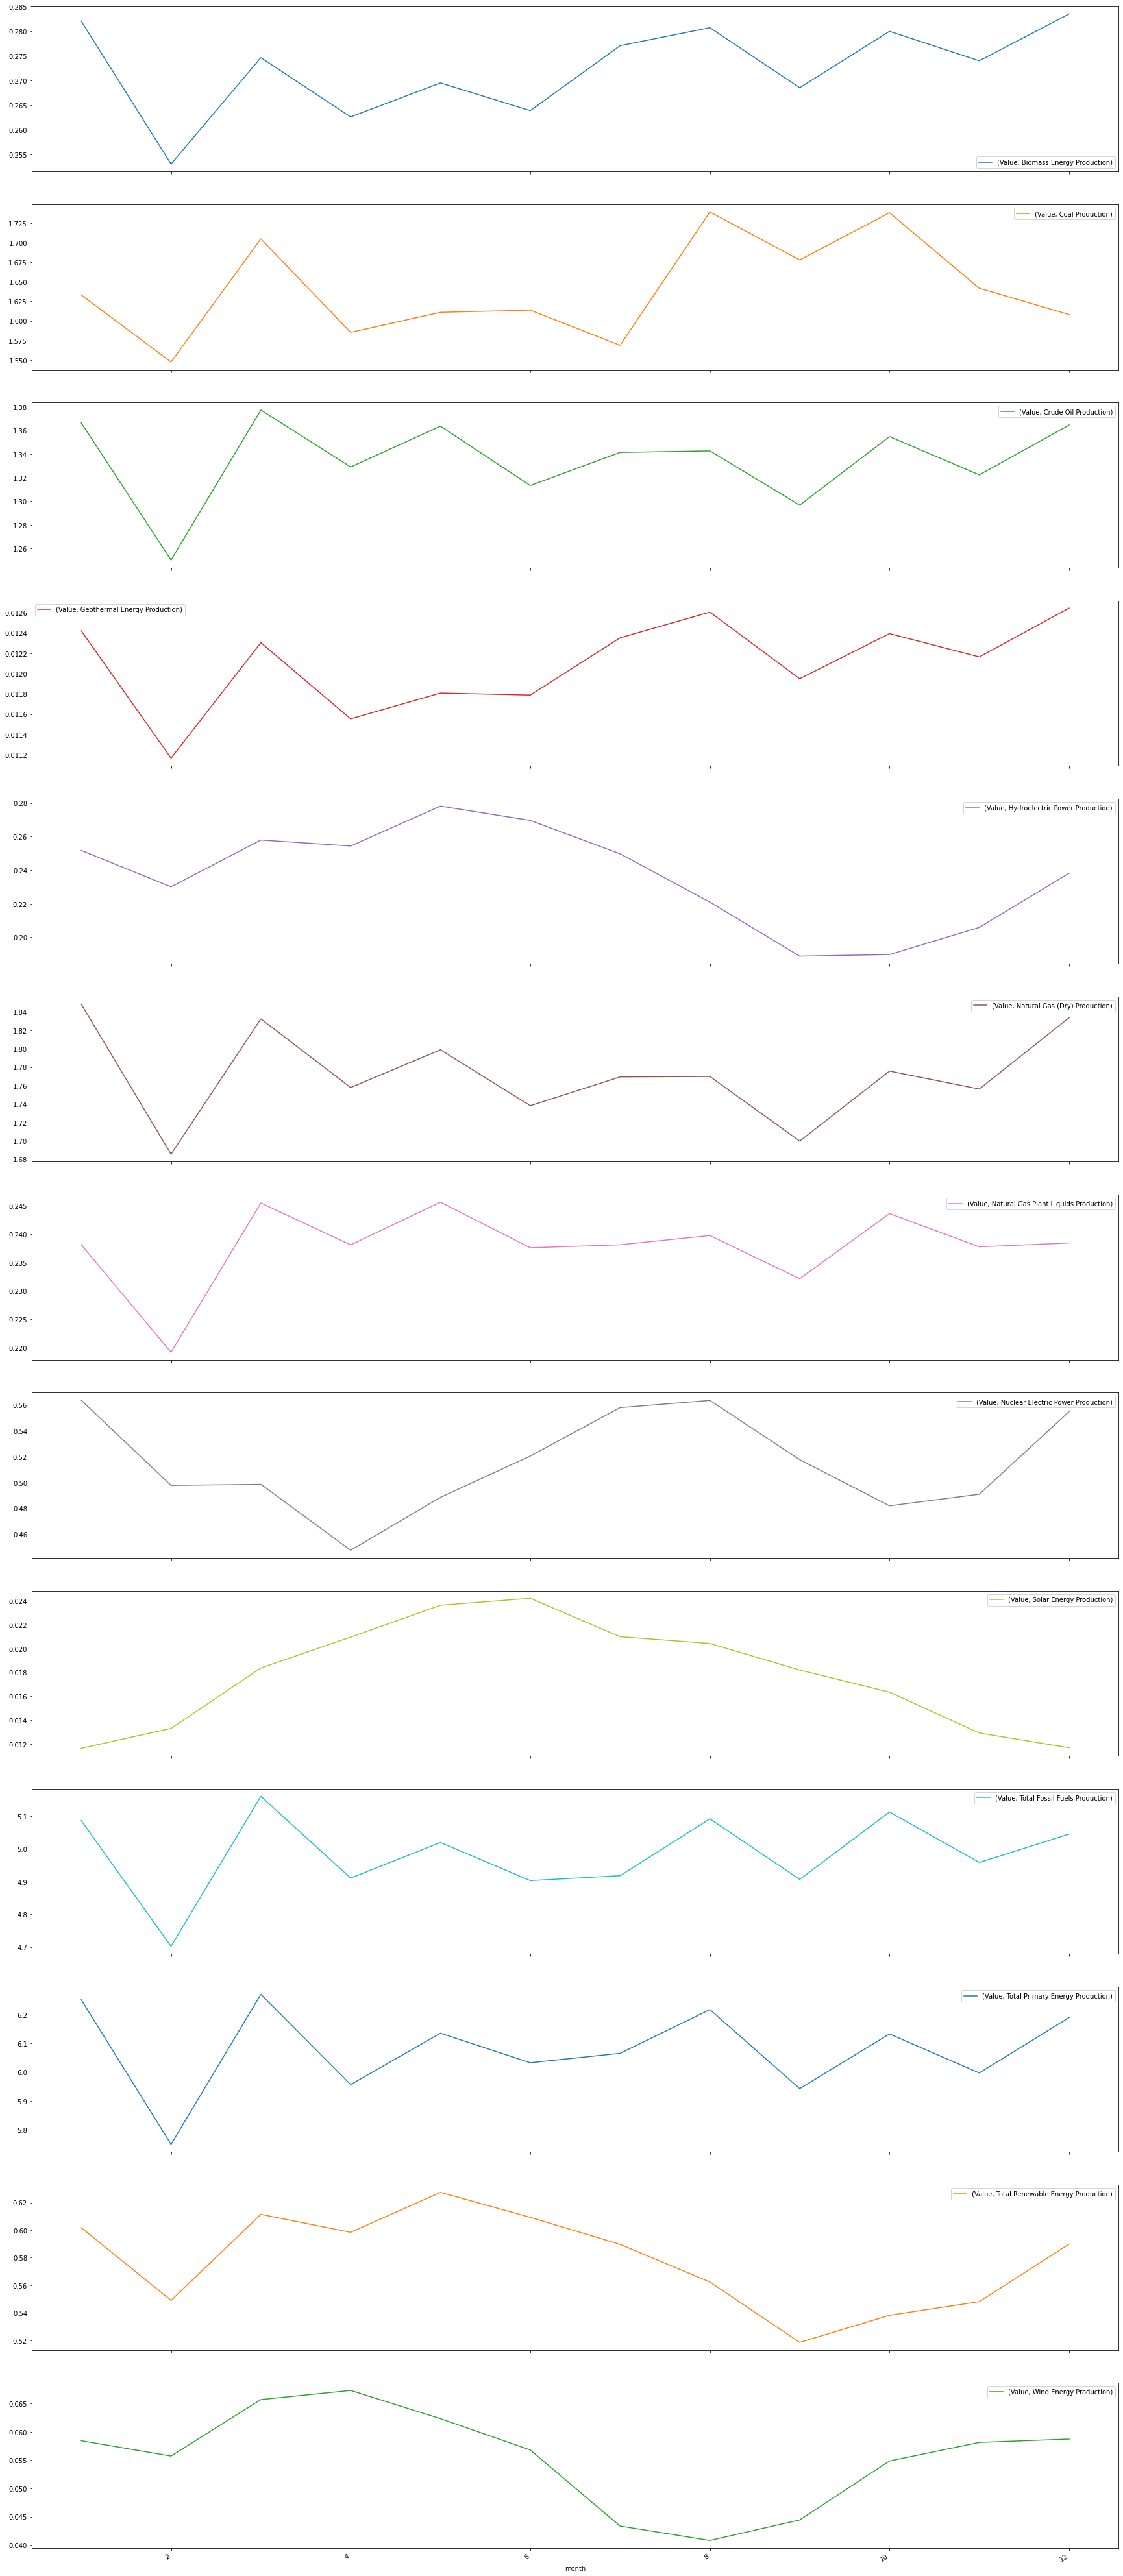

In [277]:
production_by_source['month'] = production_by_source.index.month
production_by_source.groupby('month').mean().plot(figsize=(30,80), subplots=True);

In [180]:
solar_production = (production_by_source
                    [production_by_source['Description'] 
                     == 'Solar Energy Production'])["Value"]
                                        

<AxesSubplot:xlabel='YYYYMM'>

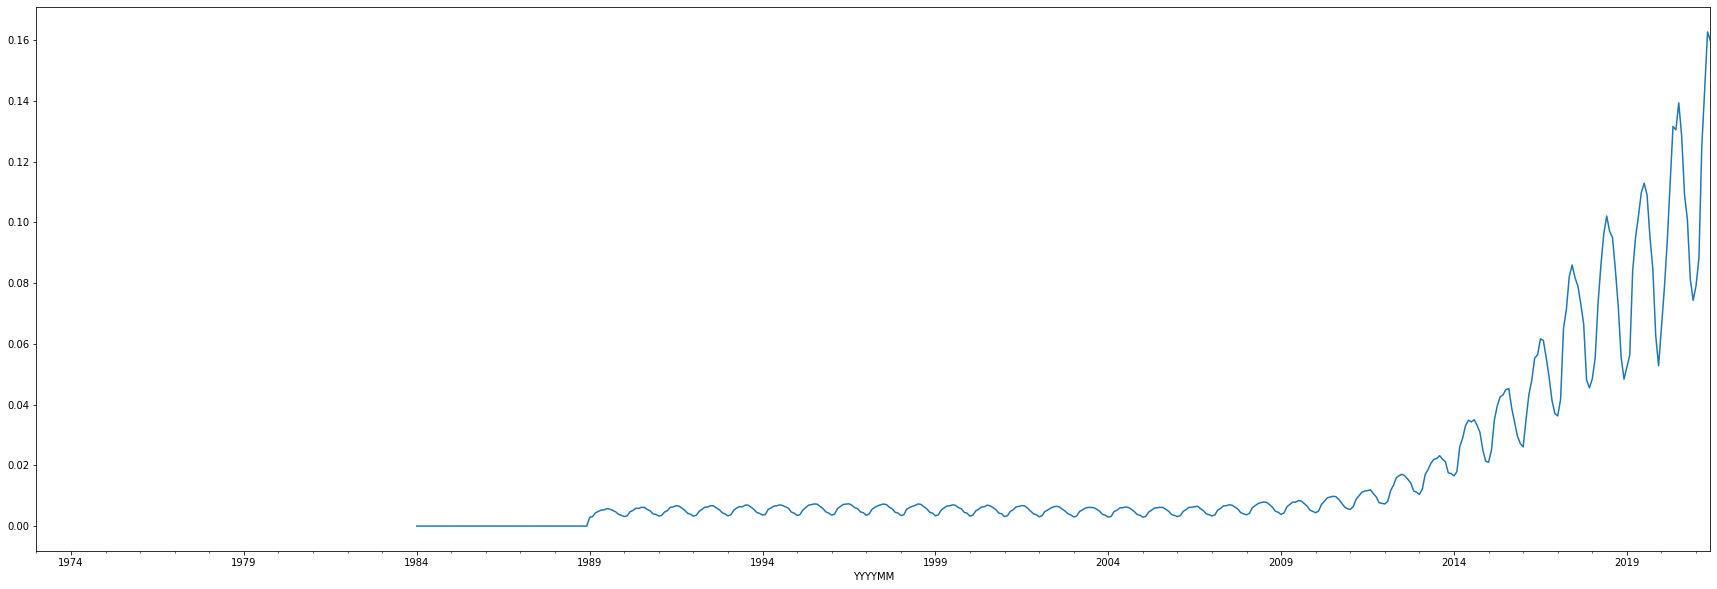

In [181]:
solar_production.plot(figsize=(30,10))

<AxesSubplot:>

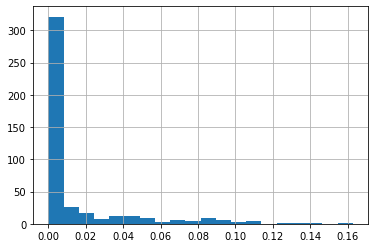

In [182]:
solar_production.hist(bins=20)

In [183]:
ff_production = (production_by_source
                    [production_by_source['Description'] 
                     == 'Total Fossil Fuels Production'])

<AxesSubplot:xlabel='YYYYMM'>

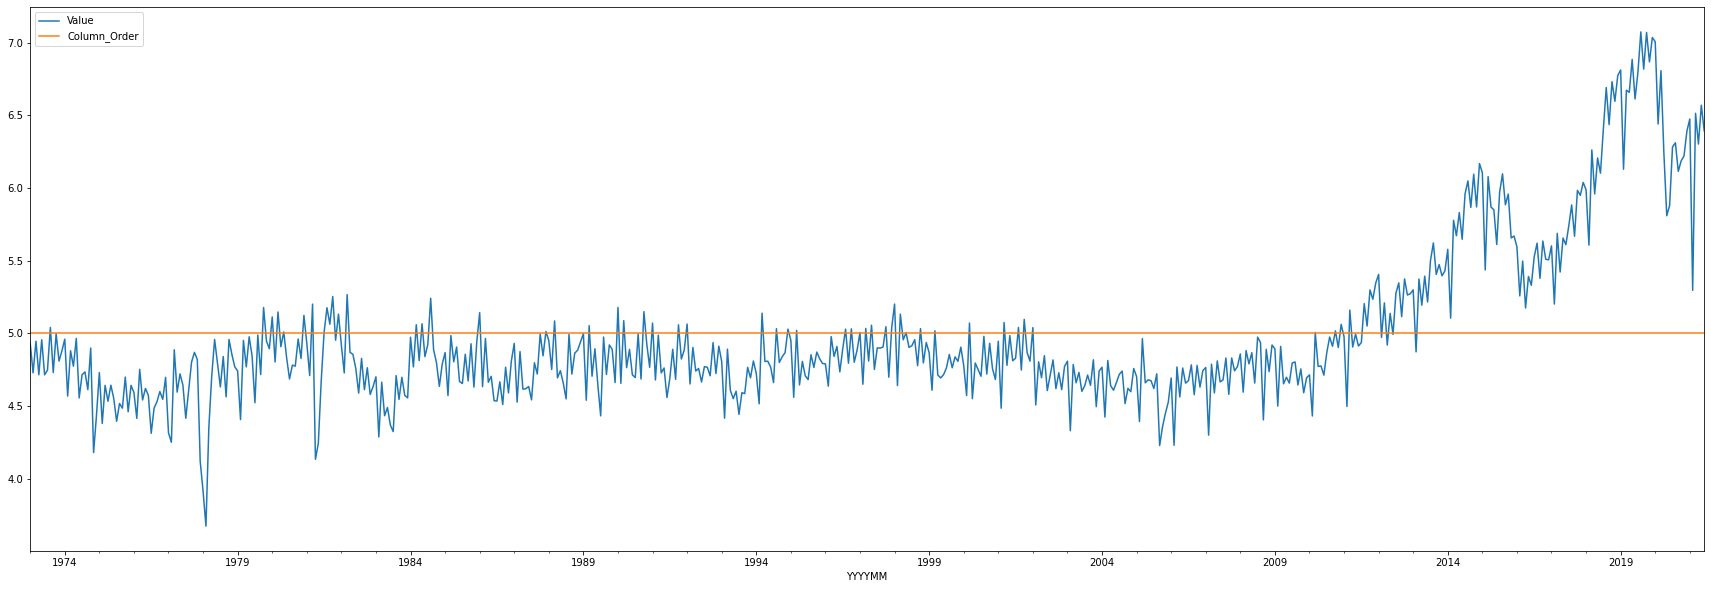

In [213]:
ff_production.plot(figsize=(30,10))

In [386]:
retail_price = pd.read_csv('data_files/EIA/average_retail_price_electricity.csv')
retail_price = clean_dataframe(retail_price)
retail_price

Value  \
Description Average Retail Price of Electricity, Commercial   
YYYYMM                                                        
1976-07-01                                             3.70   
1976-08-01                                             3.60   
1976-09-01                                             3.70   
1976-10-01                                             3.80   
1976-11-01                                             3.80   
...                                                     ...   
2021-02-01                                            11.93   
2021-03-01                                            11.13   
2021-04-01                                            10.99   
2021-05-01                                            10.84   
2021-06-01                                            11.34   

                                                             \
Description Average Retail Price of Electricity, Industrial   
YYYYMM                                                        
1976-07-01                                             2.30   
1976-08-01                                             2.20   
1976-09-01                                             2.20   
1976-10-01                                             2.20   
1976-11-01                                             2.20   
...                                                     ...   
2021-02-01                                             8.15   
2021-03-01                                             7.01   
2021-04-01                                             6.77   
2021-05-01                                             6.65   
2021-06-01                                             7.27   

                                                        \
Description Average Retail Price of Electricity, Other   
YYYYMM                                                   
1976-07-01                                         NaN   
1976-08-01                                         NaN   
1976-09-01                                         NaN   
1976-10-01                                         NaN   
1976-11-01                                         NaN   
...                                                ...   
2021-02-01                                         NaN   
2021-03-01                                         NaN   
2021-04-01                                         NaN   
2021-05-01                                         NaN   
2021-06-01                                         NaN   

                                                              \
Description Average Retail Price of Electricity, Residential   
YYYYMM                                                         
1976-07-01                                              3.90   
1976-08-01                                              3.70   
1976-09-01                                              3.80   
1976-10-01                                              3.90   
1976-11-01                                              3.80   
...                                                      ...   
2021-02-01                                             13.34   
2021-03-01                                             13.29   
2021-04-01                                             13.76   
2021-05-01                                             13.71   
2021-06-01                                             13.85   

                                                        \
Description Average Retail Price of Electricity, Total   
YYYYMM                                                   
1976-07-01                                        3.00   
1976-08-01                                        3.00   
1976-09-01                                        3.10   
1976-10-01                                        3.20   
1976-11-01                                        3.10   
...                                                ...   
2021-02-01                                       11.60  

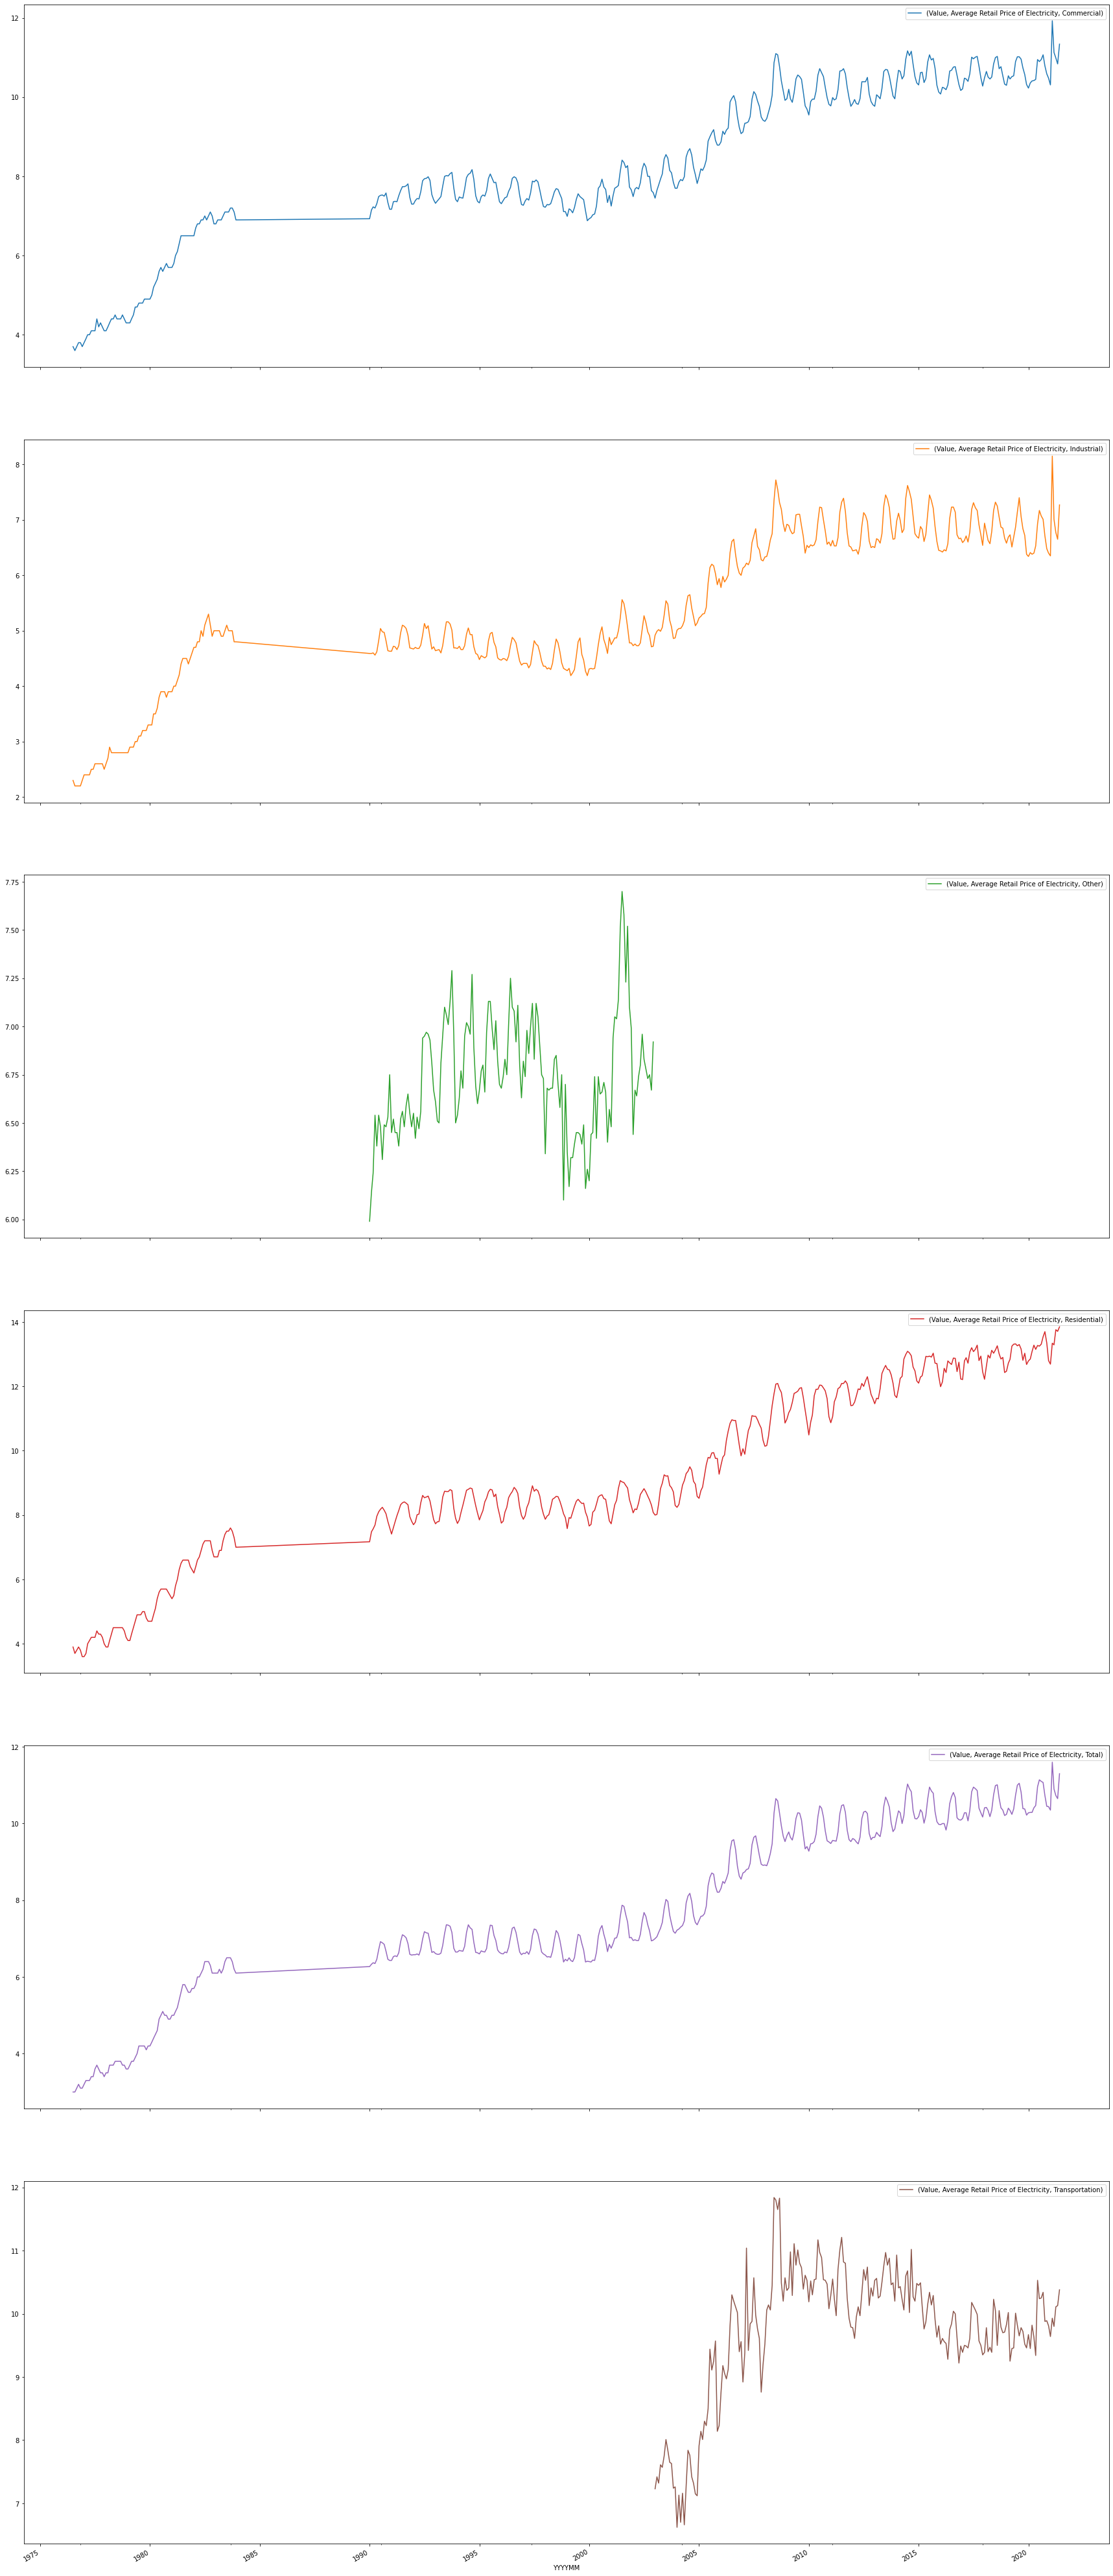

In [288]:
retail_price.plot(figsize=(30,80), subplots=True);

In [187]:
retail_price['Description'].unique()

array(['Average Retail Price of Electricity, Residential',
       'Average Retail Price of Electricity, Commercial',
       'Average Retail Price of Electricity, Industrial',
       'Average Retail Price of Electricity, Transportation',
       'Average Retail Price of Electricity, Other',
       'Average Retail Price of Electricity, Total'], dtype=object)

In [188]:
retail_price_res = retail_price[retail_price['Description'] == 'Average Retail Price of Electricity, Residential']

<AxesSubplot:xlabel='YYYYMM'>

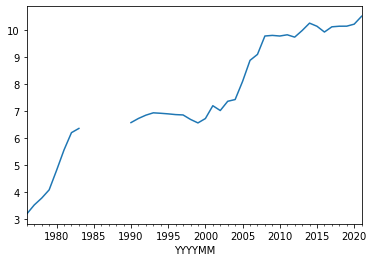

In [189]:
retail_price.resample('A').mean()['Value'].plot()

In [312]:
renewable_residential = pd.read_csv('data_files/EIA/renewable_residential.csv')
columns = renewable_residential['Description'].unique()
renewable_residential = clean_dataframe(renewable_residential)

In [316]:
columns

array(['Geothermal Energy Consumed by the Residential Sector',
       'Solar Energy Consumed by the Residential Sector',
       'Wood Energy Consumed by the Residential Sector',
       'Total Renewable Energy Consumed by the Residential Sector',
       'Hydroelectric Power Consumed by the Commercial Sector',
       'Geothermal Energy Consumed by the Commercial Sector',
       'Solar Energy Consumed by the Commercial Sector',
       'Wind Energy Consumed by the Commercial Sector',
       'Wood Energy Consumed by the Commercial Sector',
       'Waste Energy Consumed by the Commercial Sector',
       'Fuel Ethanol, Excluding Denaturant, Consumed by the Commercial Sector',
       'Biomass Energy Consumed by the Commercial Sector',
       'Total Renewable Energy Consumed by the Commercial Sector'],
      dtype=object)

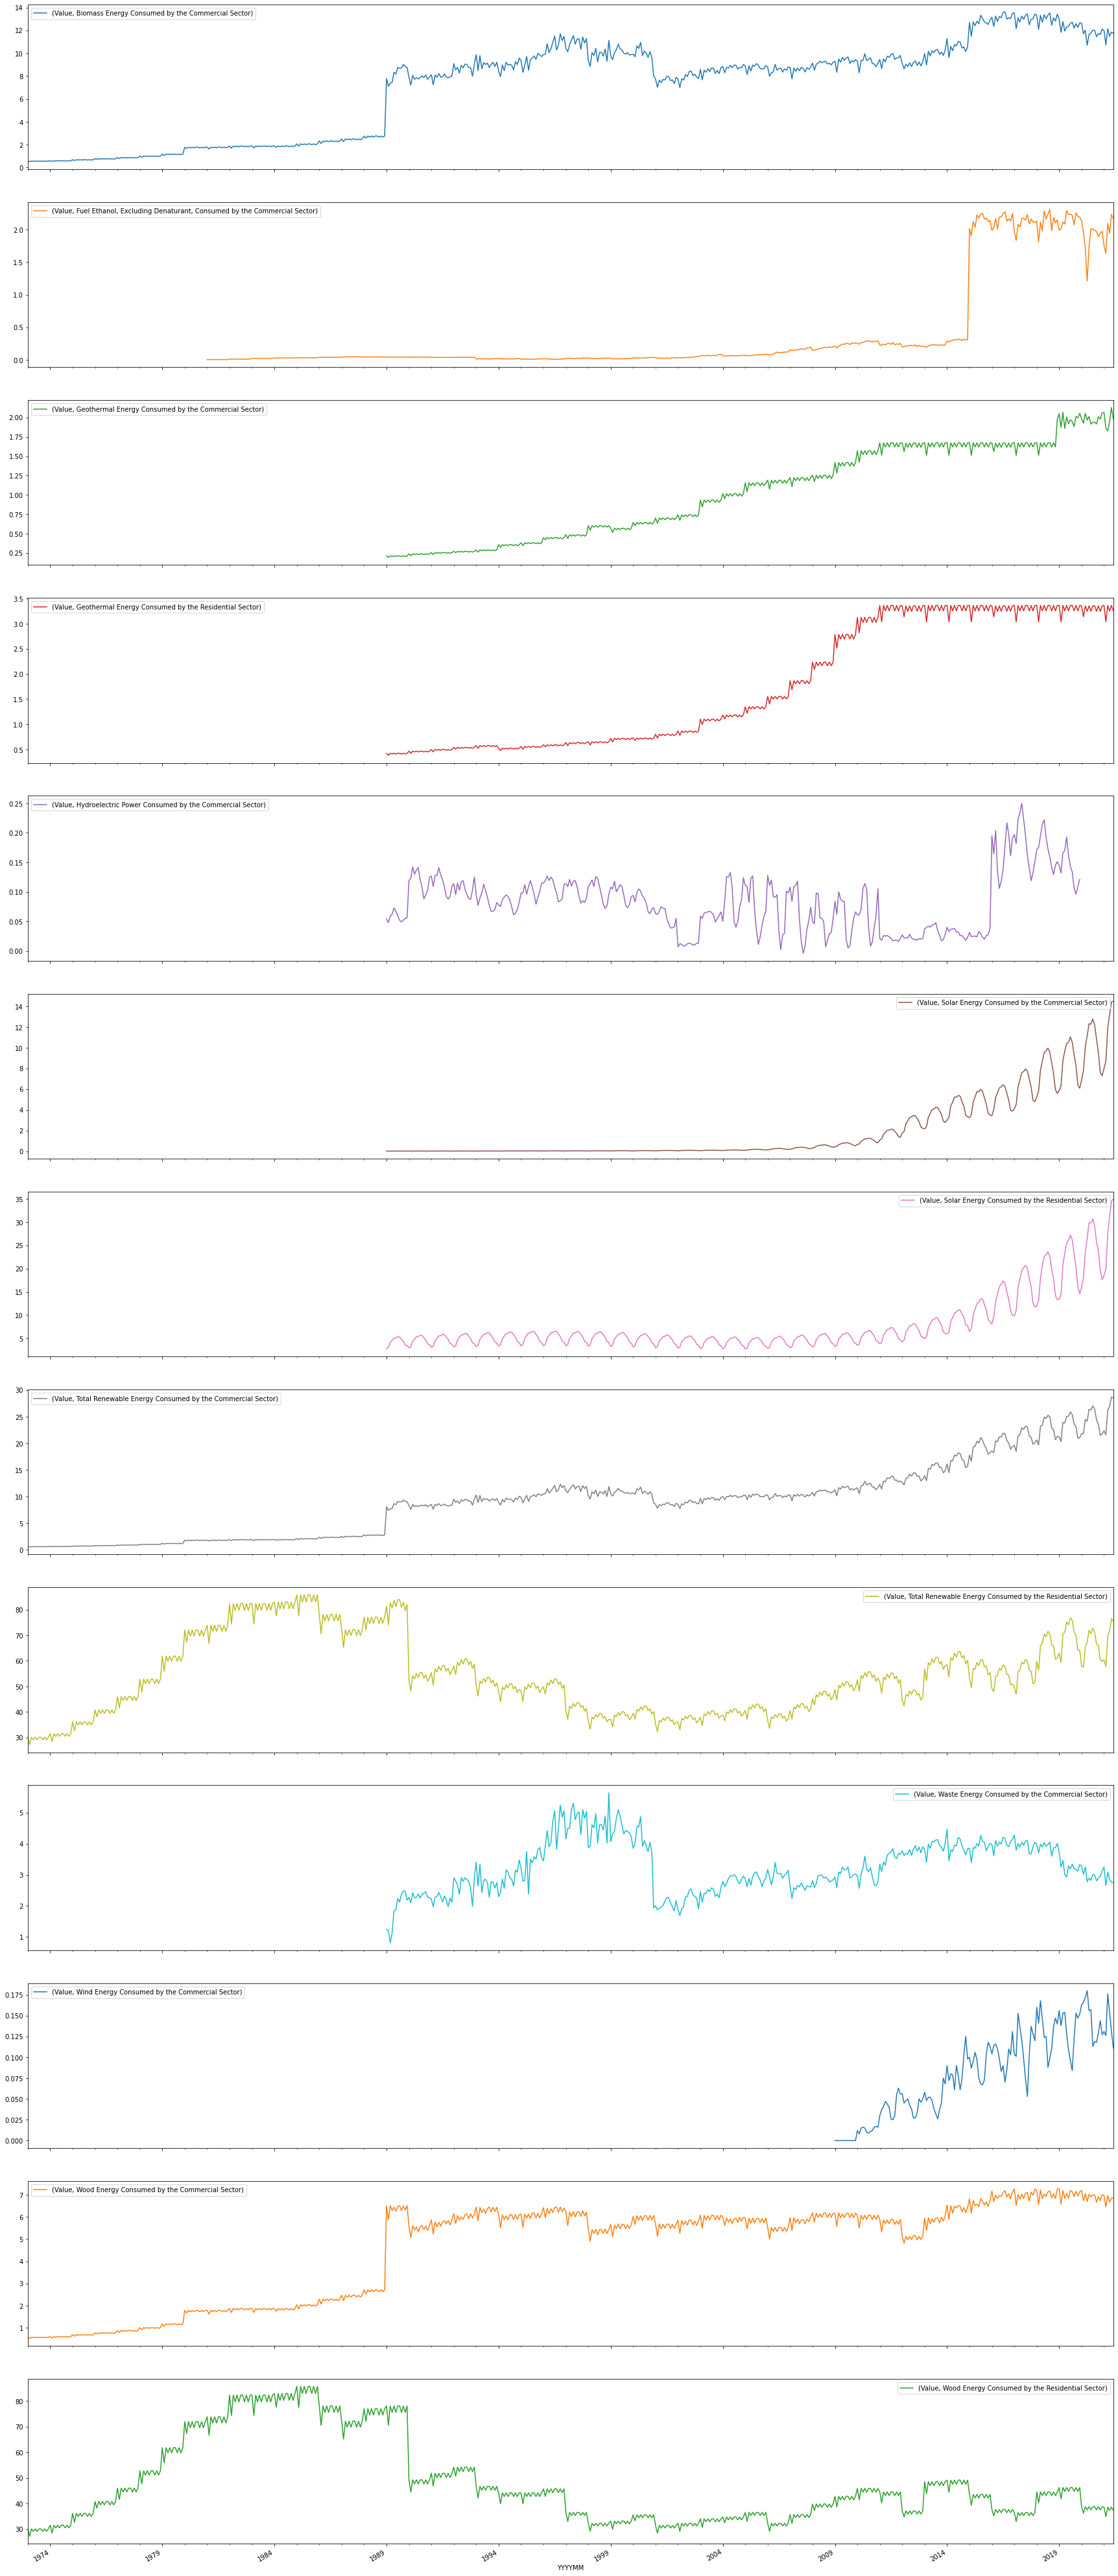

In [313]:
renewable_residential.plot(figsize=(30,80), subplots=True);

<AxesSubplot:xlabel='YYYYMM'>

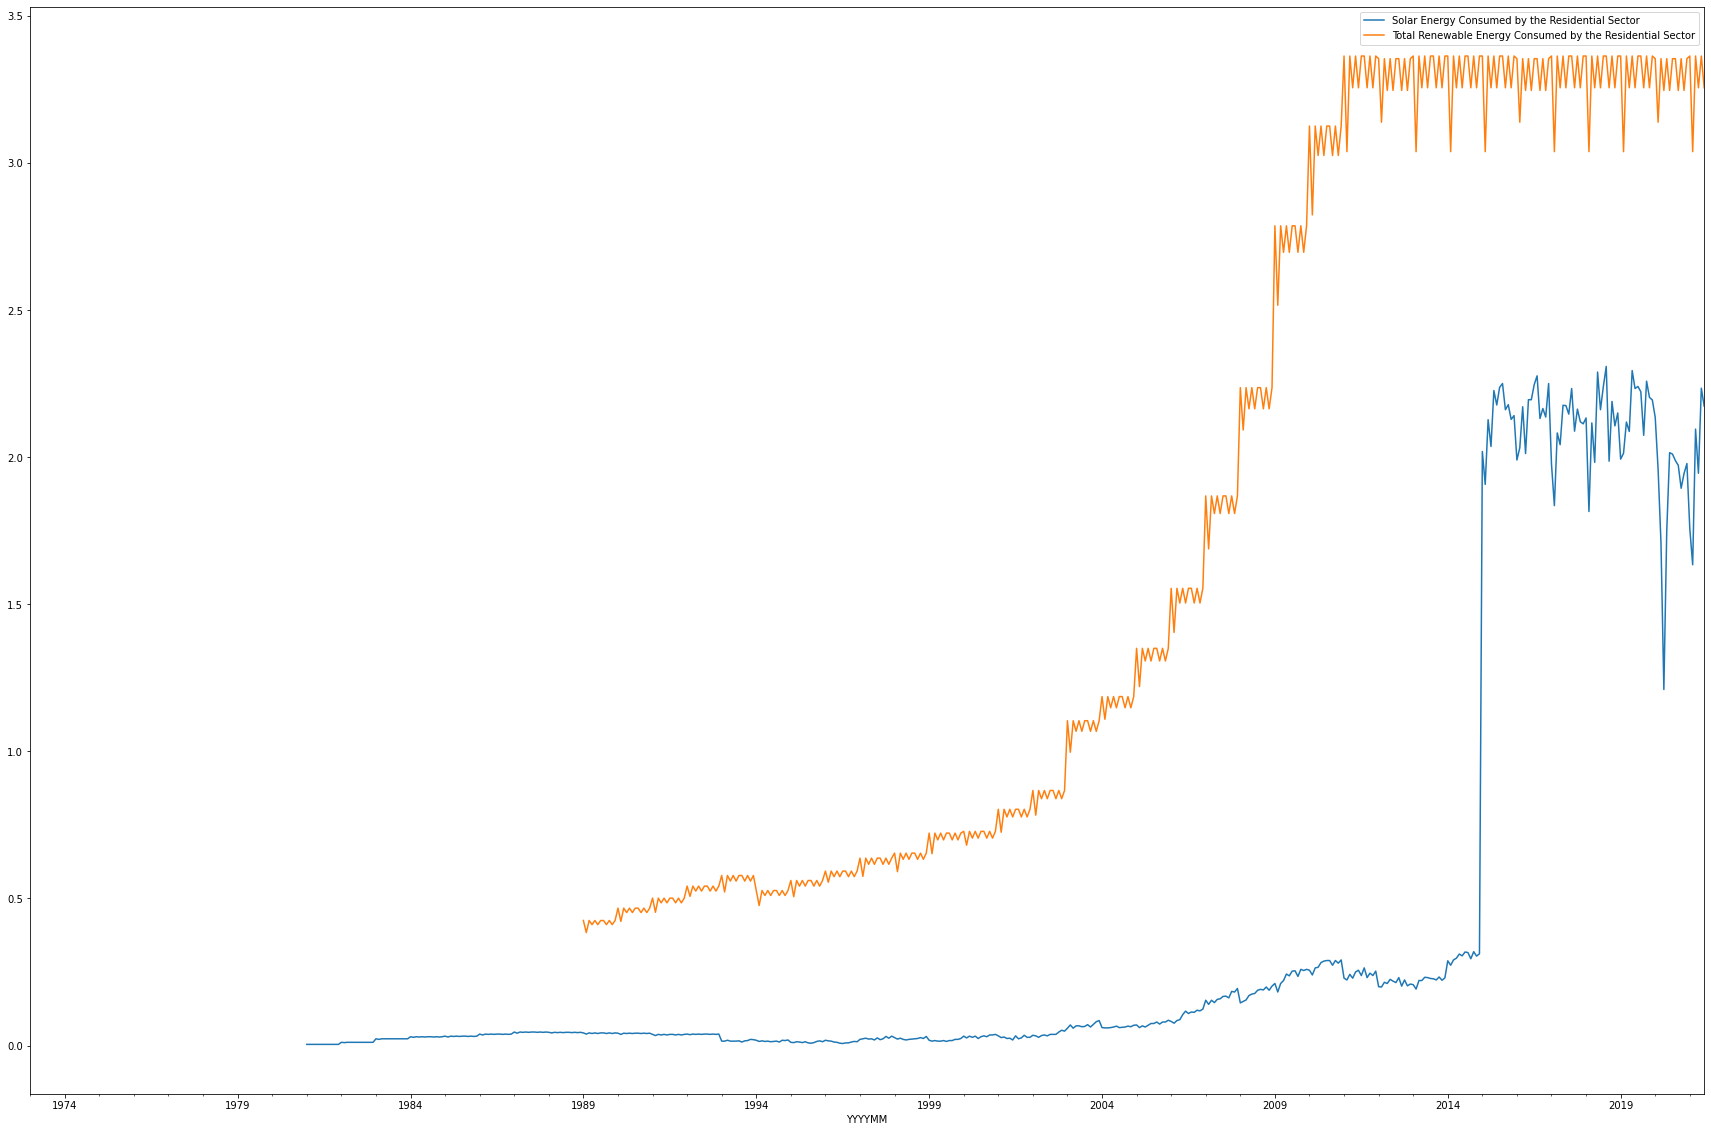

In [322]:
renewable_residential.columns = columns
renewable_residential[['Solar Energy Consumed by the Residential Sector', 'Total Renewable Energy Consumed by the Residential Sector']].plot(figsize=(30,20))

In [341]:
gas_prices = pd.read_csv('data_files/EIA/natural_gas_prices.csv')
gas_prices['Description'].unique()

array(['Natural Gas Price, Wellhead', 'Natural Gas Price, Citygate',
       'Natural Gas Price, Delivered to Consumers, Residential',
       'Percentage of Residential Sector Consumption for Which Price Data Are Available',
       'Natural Gas Price, Delivered to Consumers, Commercial',
       'Percentage of Commercial Sector Consumption for Which Price Data Are Available',
       'Natural Gas Price, Delivered to Consumers, Industrial',
       'Percentage of Industrial Sector Consumption for Which Price Data Are Available',
       'Natural Gas Transportation Sector Price',
       'Natural Gas Price, Electric Power Sector',
       'Percentage of Electric Power Sector Consumption for Which Price Data Are Available'],
      dtype=object)

In [344]:
gas_prices = (gas_prices
    [(gas_prices['Description'] == 'Natural Gas Price, Citygate')|
     (gas_prices['Description'] == 'Natural Gas Price, Delivered to Consumers, Residential')])
gas_prices = clean_dataframe(gas_prices)

<AxesSubplot:xlabel='YYYYMM'>

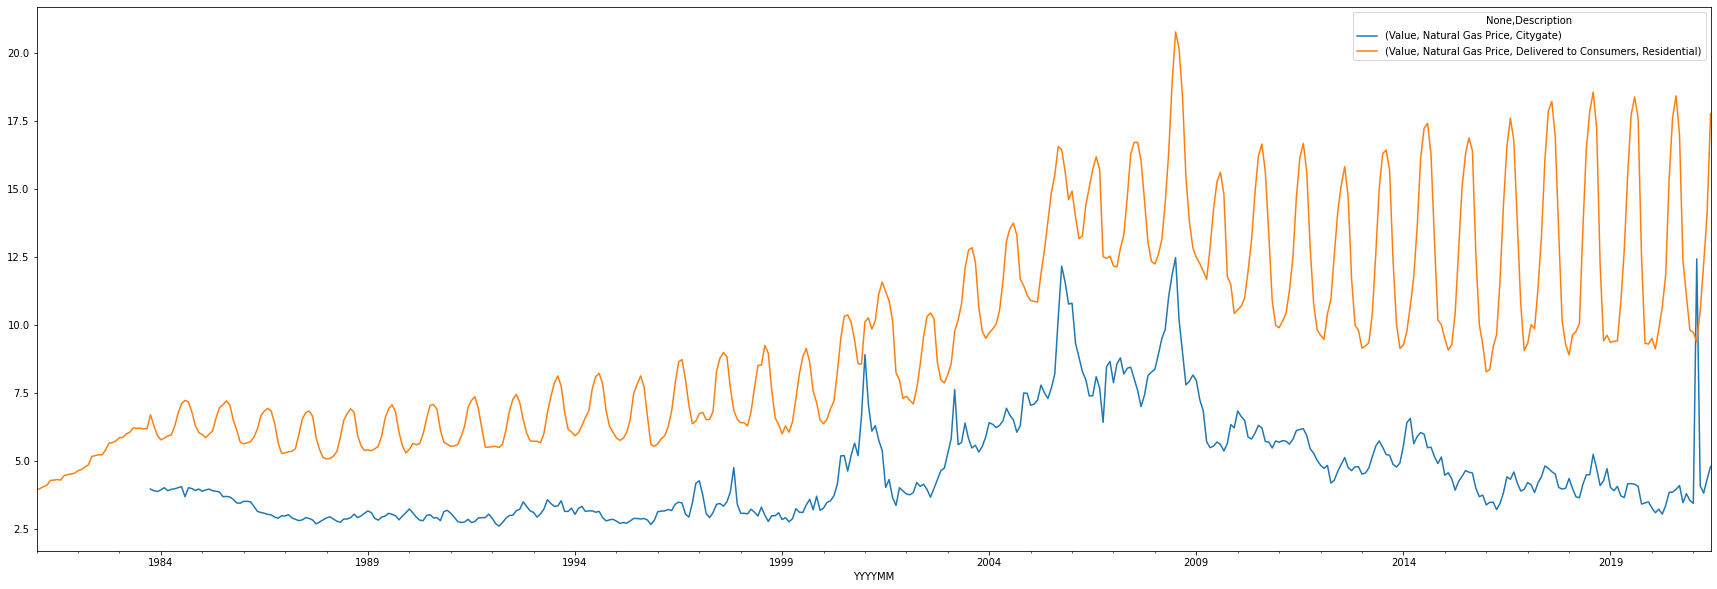

In [346]:
gas_prices.plot(figsize=(30,10))

In [348]:
cons_by_source = pd.read_csv('data_files/EIA/energy_consumption_by_source.csv')

array([<AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>],
      dtype=object)

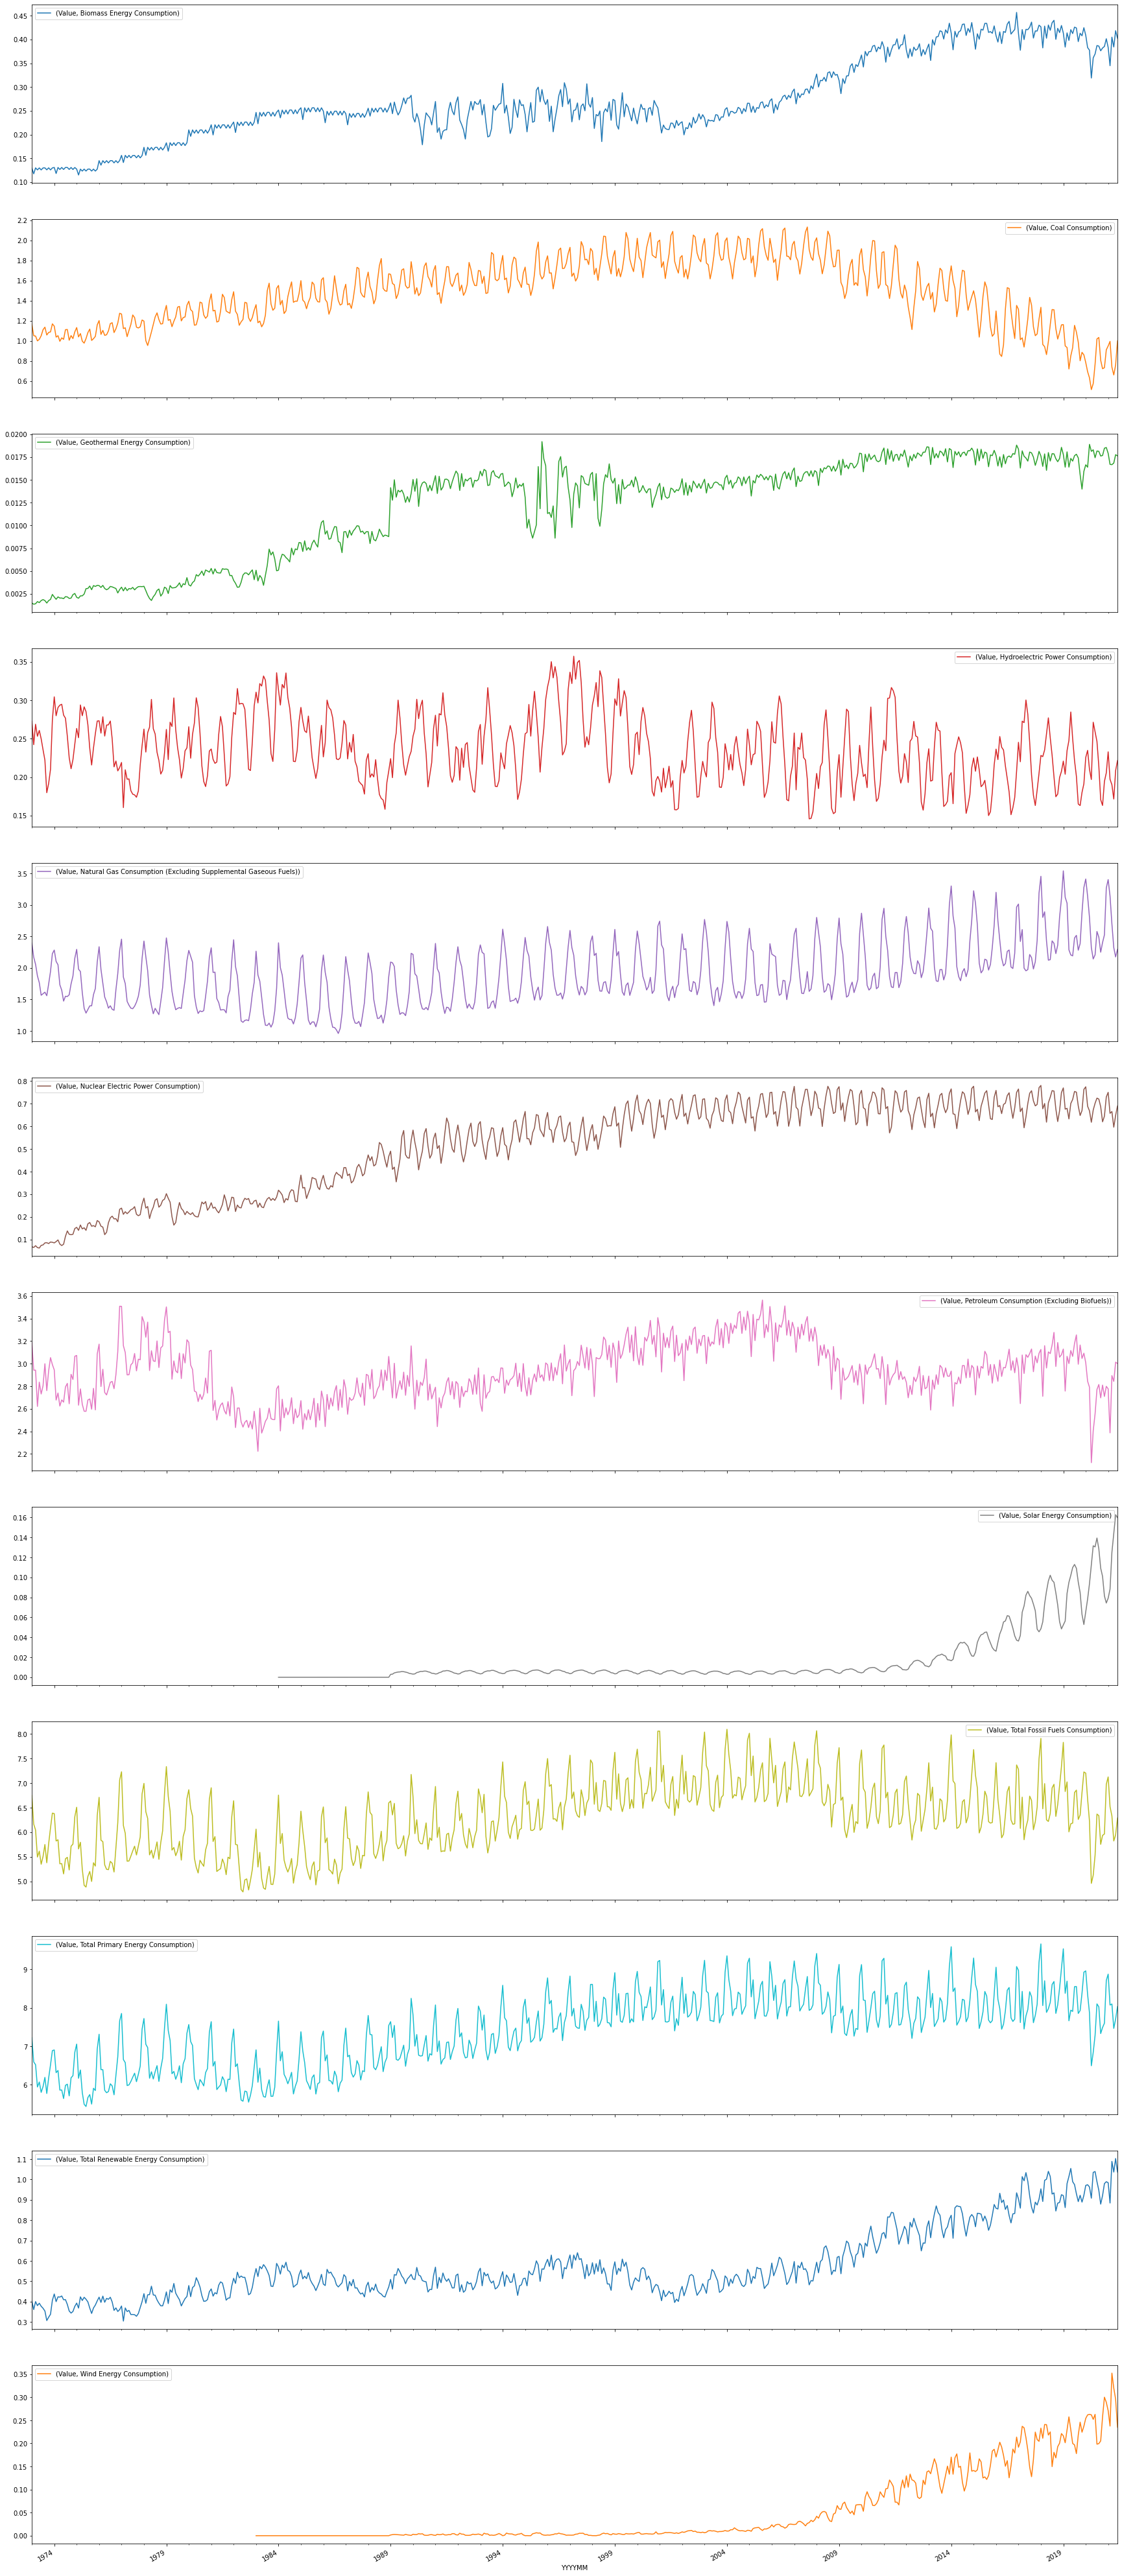

In [352]:
clean_dataframe(cons_by_source).plot(figsize=(30,80), subplots=True)

In [355]:
cons_by_sector = pd.read_csv('data_files/EIA/residential_consumption_by_sector.csv')

In [358]:
cons_by_sector = clean_dataframe(cons_by_sector)

array([<AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>],
      dtype=object)

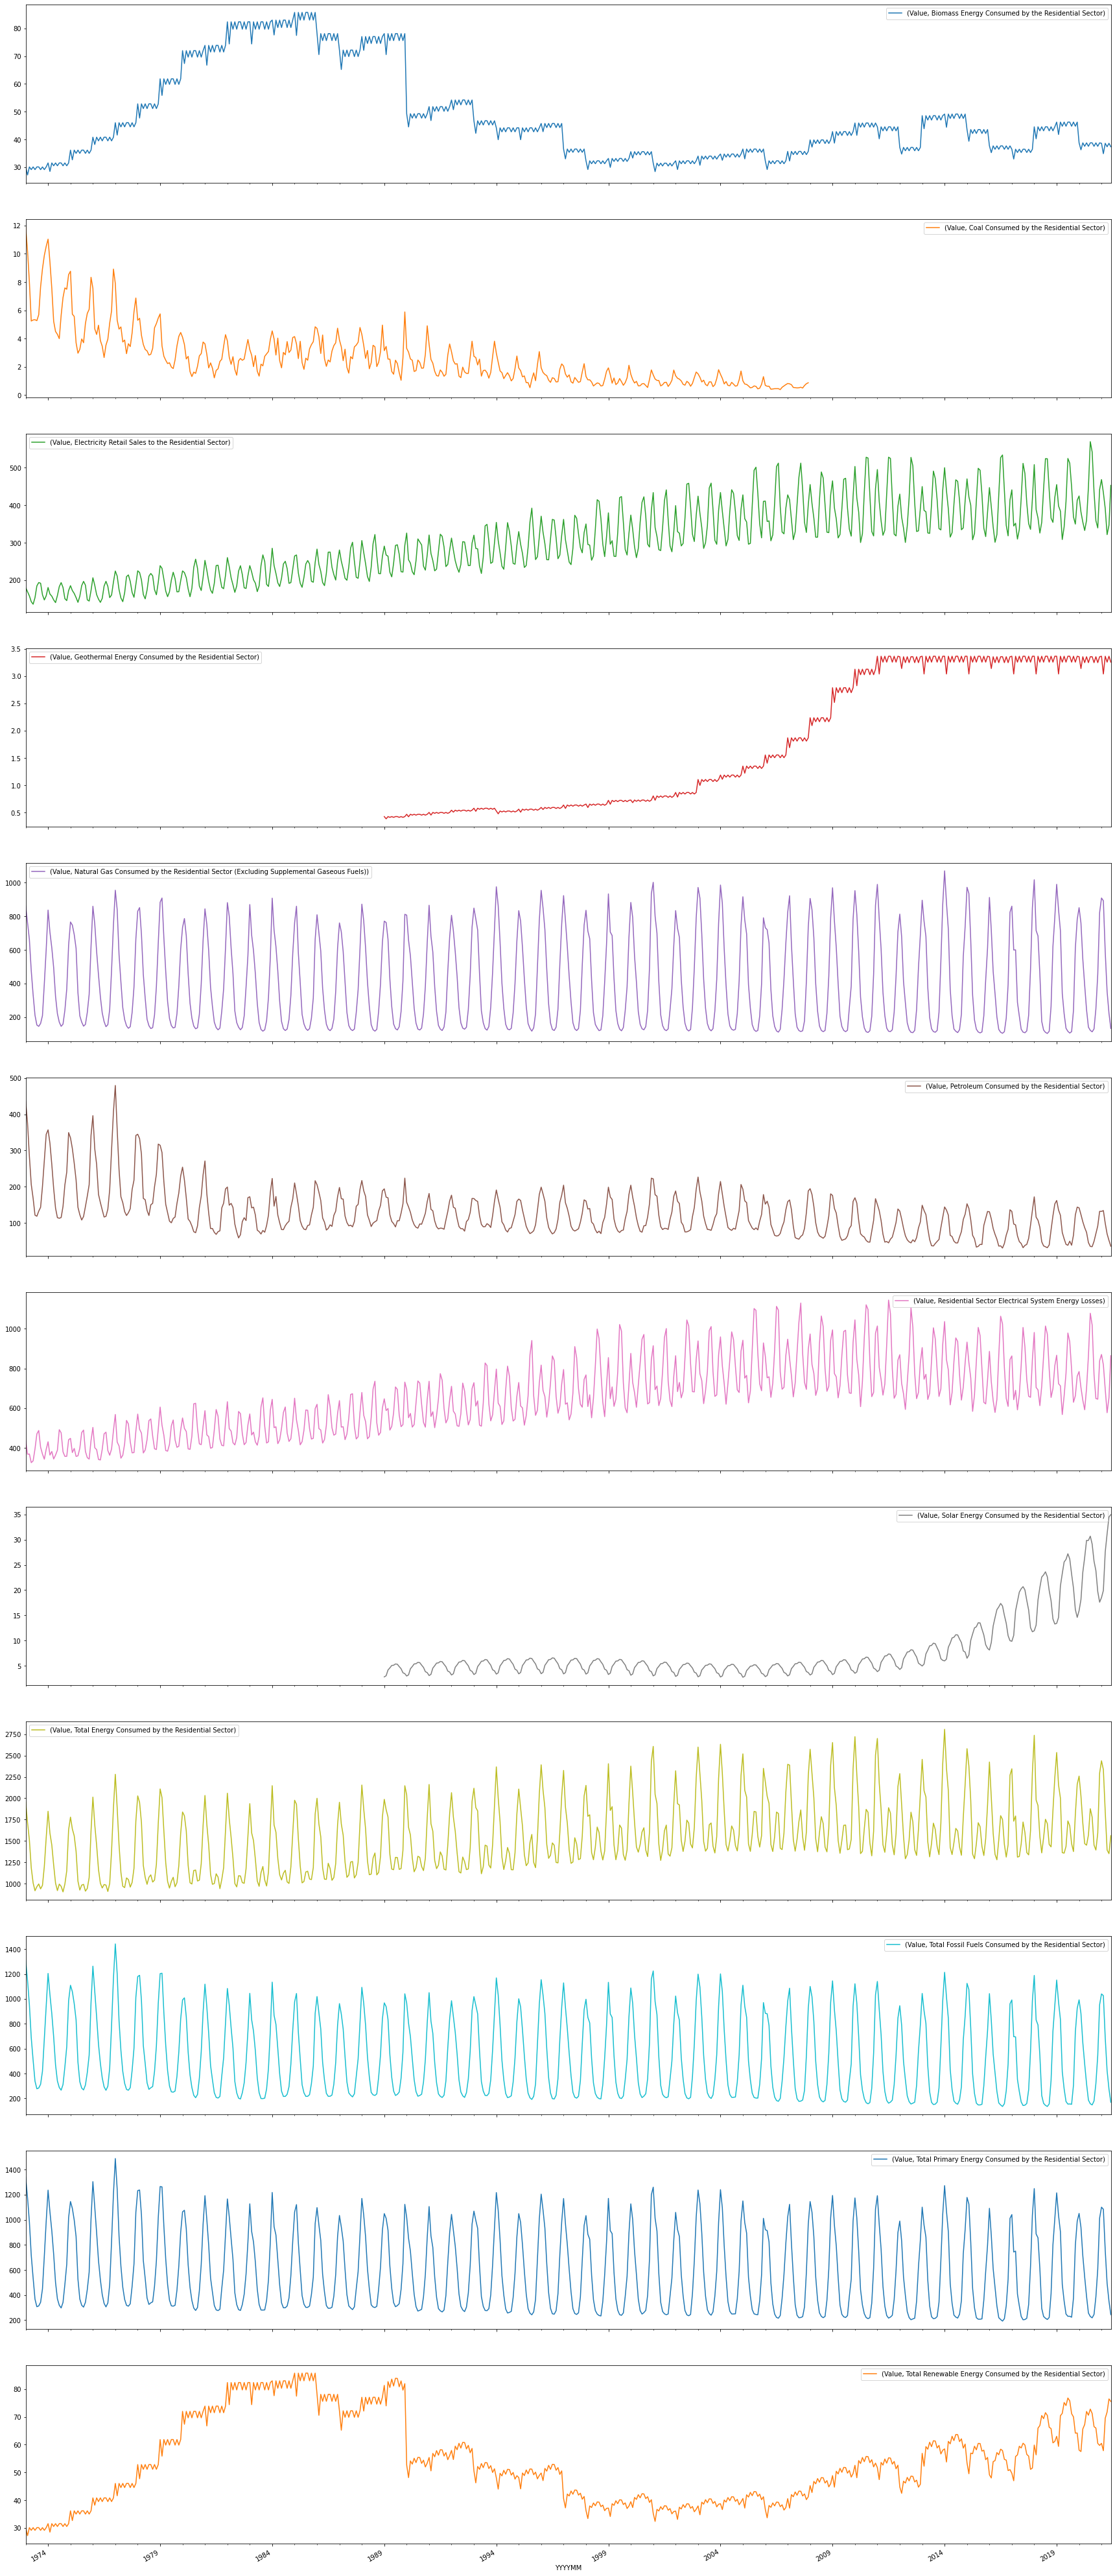

In [359]:
cons_by_sector.plot(figsize=(30,80), subplots=True)

array([<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>],
      dtype=object)

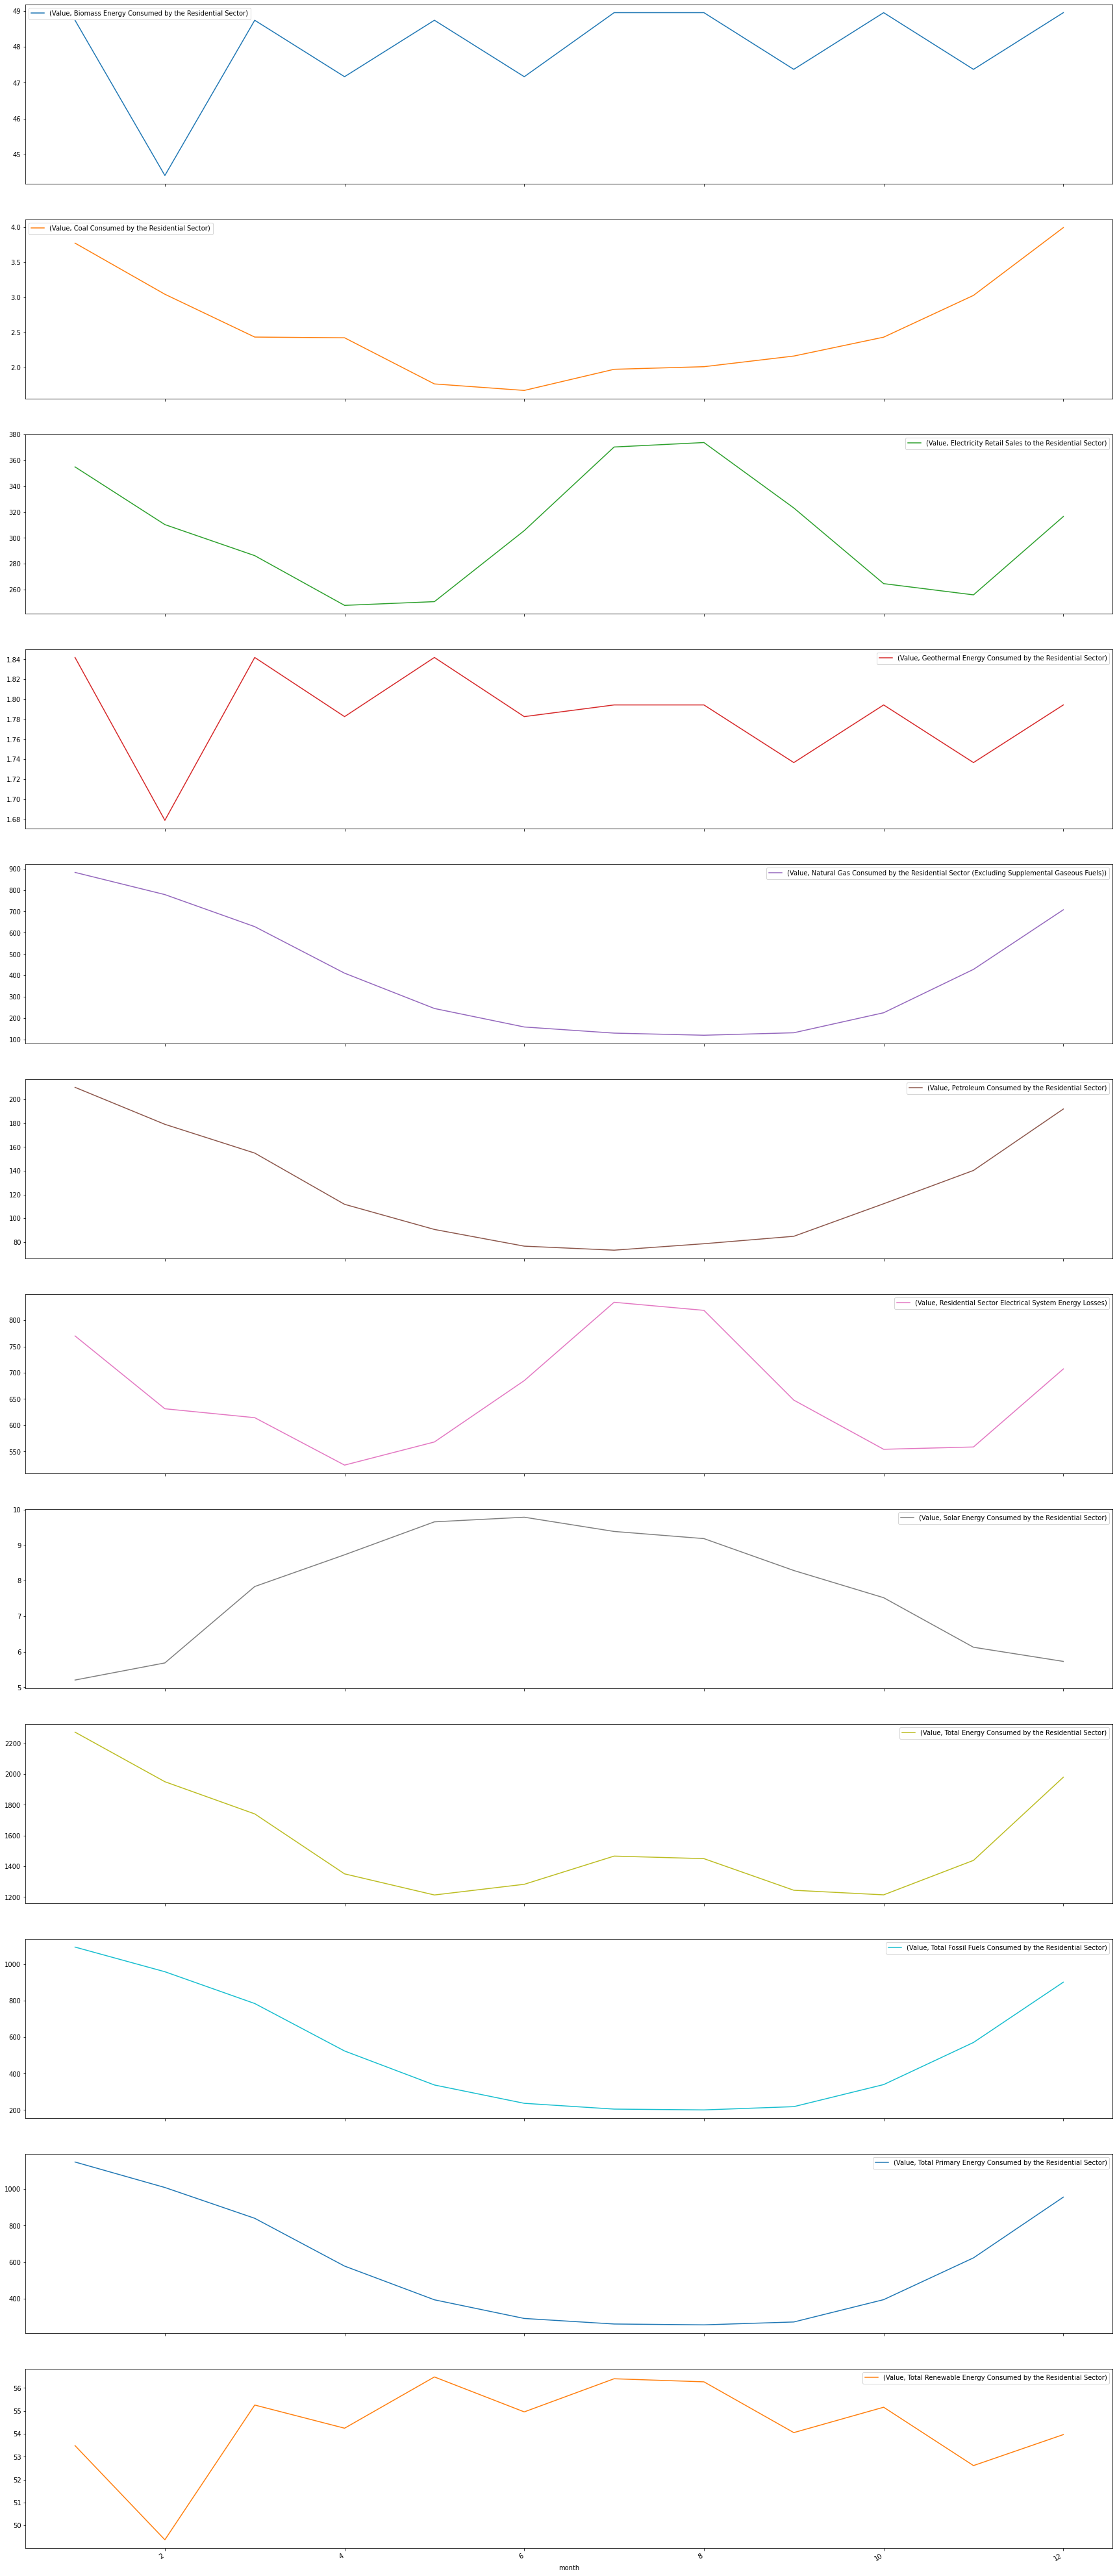

In [363]:
cons_by_sector['month'] = cons_by_sector.index.month
cons_by_sector.groupby('month').mean().plot(figsize=(30,80), subplots=True)

In [376]:
solar_gen = pd.read_csv('data_files/EIA/solar_generation.csv')

In [377]:
solar_gen = solar_gen[solar_gen['Description']=='Distributed Solar Photovoltaic Generation: Residential Sector']
solar_gen = clean_dataframe(solar_gen)

<AxesSubplot:xlabel='YYYYMM'>

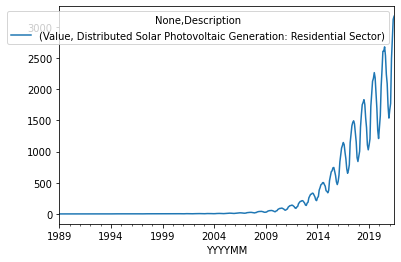

In [378]:

solar_gen.plot()

In [382]:
crude_oil = pd.read_csv('data_files/EIA/crude_oil_price.csv')
crude_oil = crude_oil[crude_oil['Description'] == 'Refiner Acquisition Cost of Crude Oil, Composite']

<AxesSubplot:xlabel='YYYYMM'>

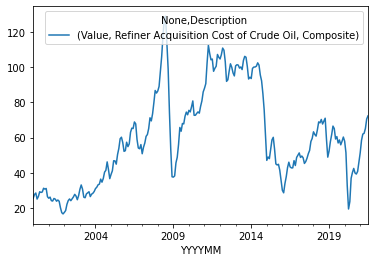

In [385]:
clean_dataframe(crude_oil)['2000':].plot()

In [435]:
solar_uses = pd.read_csv('data_files/EIA/solar_uses.csv')

In [436]:
solar_uses['Value'] = pd.to_numeric(solar_uses['Value'], errors='coerce')
solar_uses = pd.pivot_table(solar_uses, index=['YYYYMM'], values=['Value'], columns=['Description'])
# solar_uses.index = pd.to_datetime(solar_uses.index, format='%Y%m')

array([<AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>, <AxesSubplot:xlabel='YYYYMM'>,
       <AxesSubplot:xlabel='YYYYMM'>], dtype=object)

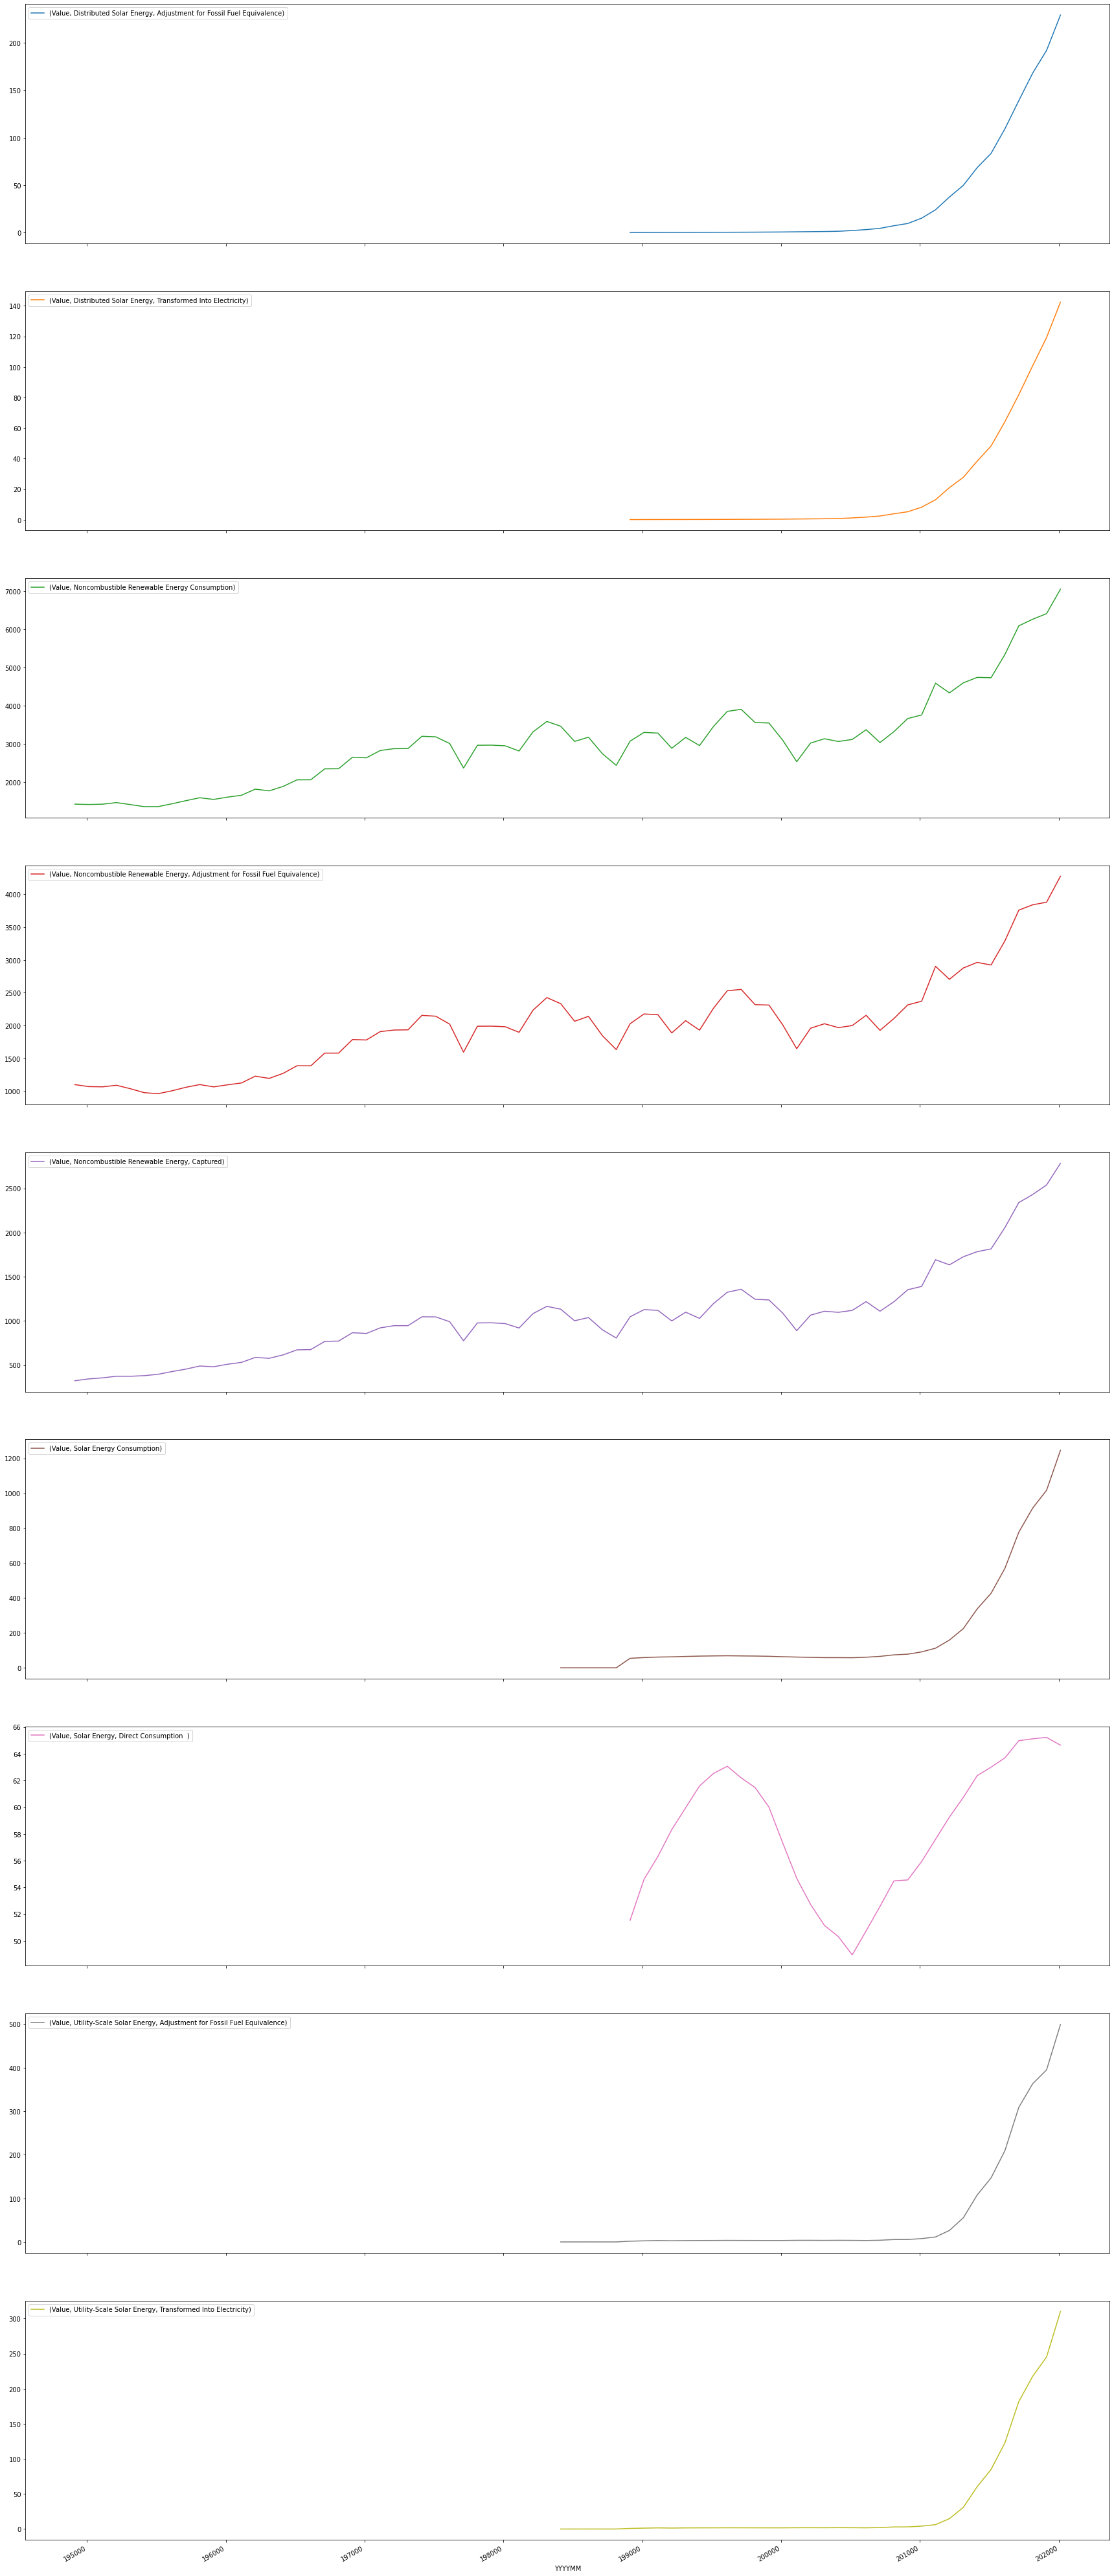

In [438]:
solar_uses.plot(figsize=(30,80), subplots=True)

In [452]:
net_2019 = pd.read_excel('data_files/EIA/net_metering2019.xlsx', sheet_name = 'Monthly_Totals-States')
net_2019.columns = net_2019.iloc[2]

In [455]:
net_2019

2                                                 Year  Month  State  \
0                              Utility Characteristics    NaN    NaN   
1                                                  NaN    NaN    NaN   
2                                                 Year  Month  State   
3                                                 2019      1     AK   
4                                                 2019      1     AL   
..                                                 ...    ...    ...   
611                                               2019     12     WA   
612                                               2019     12     WI   
613                                               2019     12     WV   
614                                               2019     12     WY   
615  NM = Not Meaningful due to large relative stan...    NaN    NaN   

2    Data Status   Residential  Commercial  Industrial  Transportation  \
0            NaN  Photovoltaic         NaN         NaN             NaN   
1            NaN   Capacity MW         NaN         NaN             NaN   
2    Data Status   Residential  Commercial  Industrial  Transportation   
3          Final         2.118       0.844       0.043               0   
4          Final            NM          NM           .               .   
..           ...           ...         ...         ...             ...   
611        Final       142.765      22.735       0.397               0   
612        Final         38.48      23.923       10.36               0   
613        Final         6.179       2.754       0.058               0   
614        Final         4.773       1.339       0.234               0   
615          NaN           NaN         NaN         NaN             NaN   

2      Total  Residential  ...  Residential  Commercial  Industrial  \
0        NaN          NaN  ...          NaN         NaN         NaN   
1        NaN    Customers  ...    Customers         NaN         NaN   
2      Total  Residential  ...  Residential  Commercial  Industrial   
3      3.006          577  ...          634         109           4   
4         NM            .  ...            .           .           .   
..       ...          ...  ...          ...         ...         ...   
611  165.897        19687  ...        21034        1168          14   
612   72.763         3785  ...         4005        1007          74   
613    8.991          865  ...          904         129           2   
614    6.346          752  ...         1035         120           9   
615      NaN          NaN  ...          NaN         NaN         NaN   

2    Transportation  Total           Residential  Commercial  Industrial  \
0               NaN    NaN                   NaN         NaN         NaN   
1               NaN    NaN  Energy Sold Back MWh         NaN         NaN   
2    Transportation  Total           Residential  Commercial  Industrial   
3                 0    747                 1.815       0.089           0   
4                 .      .                     .           .           .   
..              ...    ...                   ...         ...         ...   
611               0  22216               244.649      18.471           0   
612               0   5086                74.768      54.926           0   
613               0   1035                59.573       6.465       0.192   
614               0   1164                 9.191           0           0   
615             NaN    NaN                   NaN         NaN         NaN   

2    Transportation    Total  
0               NaN      NaN  
1               NaN      NaN  
2    Transportation    Total  
3                 0    1.904  
4                 .        .  
..              ...      ...  
611               0   263.12  
612               0  129.694  
613               0    66.23  
614               0    9.191  
615             NaN      NaN  

[616 rows x 84 columns]

In [490]:
cols = ['capacity', 'customers', 'storage-capacity','storage_customers',
     'virtual_capacity','virtual_customers','energy_sold_back']

idx = list(range(1,13))

In [491]:
ga = net_2019[net_2019['State'] == 'GA']['Residential'].iloc[:,:7]
ga.columns = cols
ga.index = idx
for col in cols:
    ga[col] = pd.to_numeric(ga[col], errors='coerce')
ga

capacity  customers  storage-capacity  storage_customers  \
1       4.97        137               NaN                NaN   
2       5.05        136               NaN                NaN   
3        NaN        137               NaN                NaN   
4        NaN        137               NaN                NaN   
5        NaN        142               NaN                NaN   
6        NaN        149               NaN                NaN   
7        NaN        150               NaN                NaN   
8        NaN        160               NaN                NaN   
9        NaN        162               NaN                NaN   
10       NaN        166               NaN                NaN   
11       NaN        169               NaN                NaN   
12       NaN        181               NaN                NaN   

    virtual_capacity  virtual_customers  energy_sold_back  
1                NaN                NaN            17.438  
2                NaN                NaN            21.399  
3                NaN                NaN            47.413  
4                NaN                NaN            46.476  
5                NaN                NaN            46.862  
6                NaN                NaN            34.911  
7                NaN                NaN            35.282  
8                NaN                NaN            31.325  
9                NaN                NaN            36.537  
10               NaN                NaN            31.965  
11               NaN                NaN            35.913  
12               NaN                NaN            27.122

<AxesSubplot:>

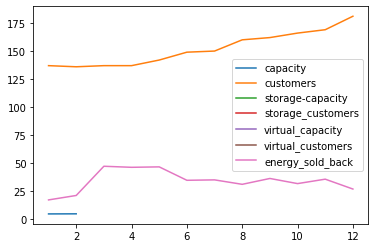

In [493]:
ga.plot()

<AxesSubplot:>

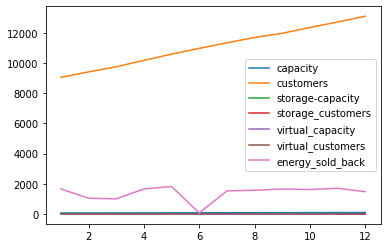

In [492]:
nc = net_2019[net_2019['State'] == 'NC']['Residential'].iloc[:,:7]
nc.columns = cols
nc.index = idx
for col in cols:
    nc[col] = pd.to_numeric(nc[col], errors='coerce')
nc.plot()

In [497]:
net_2020 = pd.read_excel('data_files/EIA/net_metering2020 (2).xlsx', sheet_name = 'Monthly_Totals-States')
net_2020.columns = net_2020.iloc[2]

<AxesSubplot:>

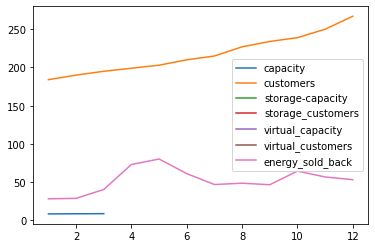

In [499]:
ga_2020= net_2020[net_2020['State'] == 'GA']['Residential'].iloc[:,:7]
ga_2020.columns = cols
ga_2020.index = idx
for col in cols:
    ga_2020[col] = pd.to_numeric(ga_2020[col], errors='coerce')
ga_2020.plot()

<AxesSubplot:>

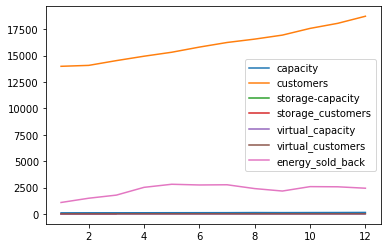

In [500]:
nc_2020= net_2020[net_2020['State'] == 'NC']['Residential'].iloc[:,:7]
nc_2020.columns = cols
nc_2020.index = idx
for col in cols:
    nc_2020[col] = pd.to_numeric(nc_2020[col], errors='coerce')
nc_2020.plot()